<a href="https://colab.research.google.com/github/HeHeHuang/DataScientist/blob/main/MayBank_DataScientist_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective: classification task, to predict whether client will default payment next month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats #for statistic analysis

import warnings
warnings.filterwarnings("ignore") # for ignore warning information
 
%matplotlib inline   

In [2]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [71]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data_scientist_Assessment.xls',sheet_name='Data',header=1)

In [4]:
pd.set_option('display.max_columns', None)   # to see all column

### Data Understanding

In [73]:
df.columns = df.columns.str.replace('default payment next month', 'Default')

In [74]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


* 25 columns with 24 features
* 30000 rows

In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [76]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


* Id will not be used in analysis
* For Education: min value is 0,max value is 6 this is outliner
* For Marriage: min value is 0, this is outliner
* range of age: 21-79
* Pay_0 got -2 value 
* Bill: got negative value.by right should be positive value 
* payment: 0-896040.00000

In [79]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Default']

#### Limit_Bal with Default

In [131]:
segments=pd.cut(df['LIMIT_BAL'],10,right=False)

In [135]:
counts=pd.value_counts(segments,sort=False)

In [136]:
counts

[10000.0, 109000.0)      12498
[109000.0, 208000.0)      7880
[208000.0, 307000.0)      5059
[307000.0, 406000.0)      2759
[406000.0, 505000.0)      1598
[505000.0, 604000.0)       127
[604000.0, 703000.0)        56
[703000.0, 802000.0)        22
[802000.0, 901000.0)         0
[901000.0, 1000990.0)        1
Name: LIMIT_BAL, dtype: int64

In [117]:
default0

##### 看看是不是limit bal 越高的人，越不容易default

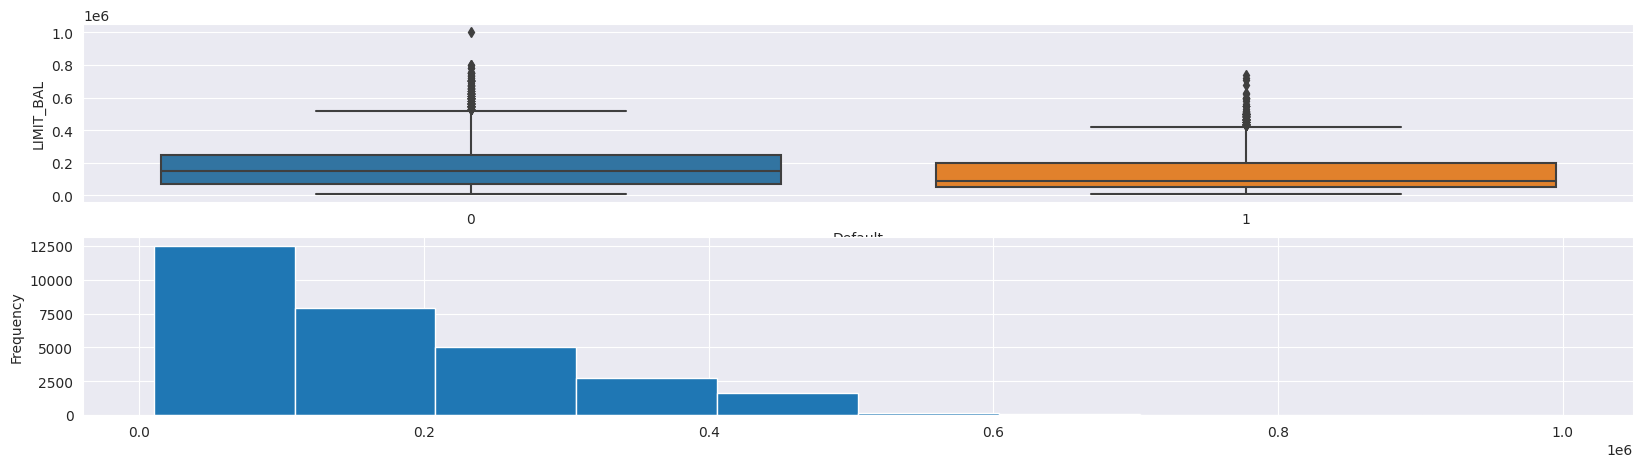

In [148]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,8),dpi = 100)
plt.subplot(3,1,1)
sns.boxplot(x='Default' , y = 'LIMIT_BAL' ,data = df )
plt.subplot(3,1,2)
#plt.hist(df['LIMIT_BAL'].values, bins=20)
dff = df['LIMIT_BAL'] 
dff.plot(kind = 'hist')

#### Marriage with Default

In [149]:
#replace outliner 0 to other 3
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

In [150]:
cross_table_marriage = pd.crosstab(df['MARRIAGE'],df['Default'])
cross_table_marriage

Default,0,1
MARRIAGE,,
1,10453,3206
2,12623,3341
3,288,89


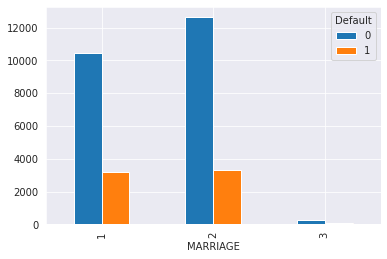

In [151]:
cross_table_marriage.plot(kind='bar')

#### gender with default 

In [144]:
cross_table_gender = pd.crosstab(df['SEX'],df['Default'])
cross_table_gender

Default,0,1
SEX,,
1,9015,2873
2,14349,3763


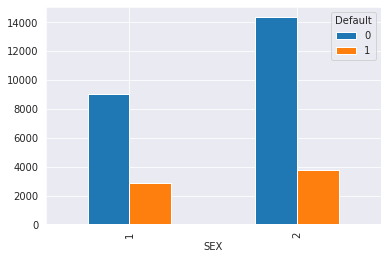

In [145]:
cross_table_gender.plot(kind='bar')


#### Education with default


In [155]:
#replace outliner 0 to other 3
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6],4)

In [156]:
cross_table_edu = pd.crosstab(df['EDUCATION'],df['Default'])
cross_table_edu

Default,0,1
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,435,33


#### 

In [89]:
cat_col = df.columns.tolist()[1:12]
categ_data = df[cat_col]
categ_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2
1,120000,2,2,2,26,-1,2,0,0,0,2
2,90000,2,2,2,34,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0
29998,80000,1,3,1,41,1,-1,0,0,0,-1


In [88]:
num_col = df.columns.tolist()[12:-1]
num_data = df[num_col]
num_data
 

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [80]:
target_col = df.columns.tolist()[-1]
target_col

'Default'

In [78]:
df['Default'].value_counts()    # get the unique count of y

0    23364
1     6636
Name: Default, dtype: int64

In [9]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

ID                            0.0
BILL_AMT2                     0.0
PAY_AMT6                      0.0
PAY_AMT5                      0.0
PAY_AMT4                      0.0
PAY_AMT3                      0.0
PAY_AMT2                      0.0
PAY_AMT1                      0.0
BILL_AMT6                     0.0
BILL_AMT5                     0.0
BILL_AMT4                     0.0
BILL_AMT3                     0.0
BILL_AMT1                     0.0
LIMIT_BAL                     0.0
PAY_6                         0.0
PAY_5                         0.0
PAY_4                         0.0
PAY_3                         0.0
PAY_2                         0.0
PAY_0                         0.0
AGE                           0.0
MARRIAGE                      0.0
EDUCATION                     0.0
SEX                           0.0
default payment next month    0.0
dtype: float64

In [10]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

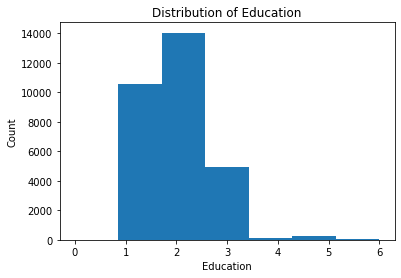

In [11]:
plt.hist(df.EDUCATION,7)
plt.title('Distribution of Education')
plt.xlabel('Education') 
plt.ylabel('Count') 
plt.show()

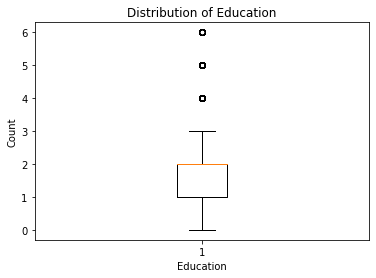

In [12]:
plt.boxplot(df.EDUCATION)
plt.title('Distribution of Education')
plt.xlabel('Education') 
plt.ylabel('Count') 
plt.show()

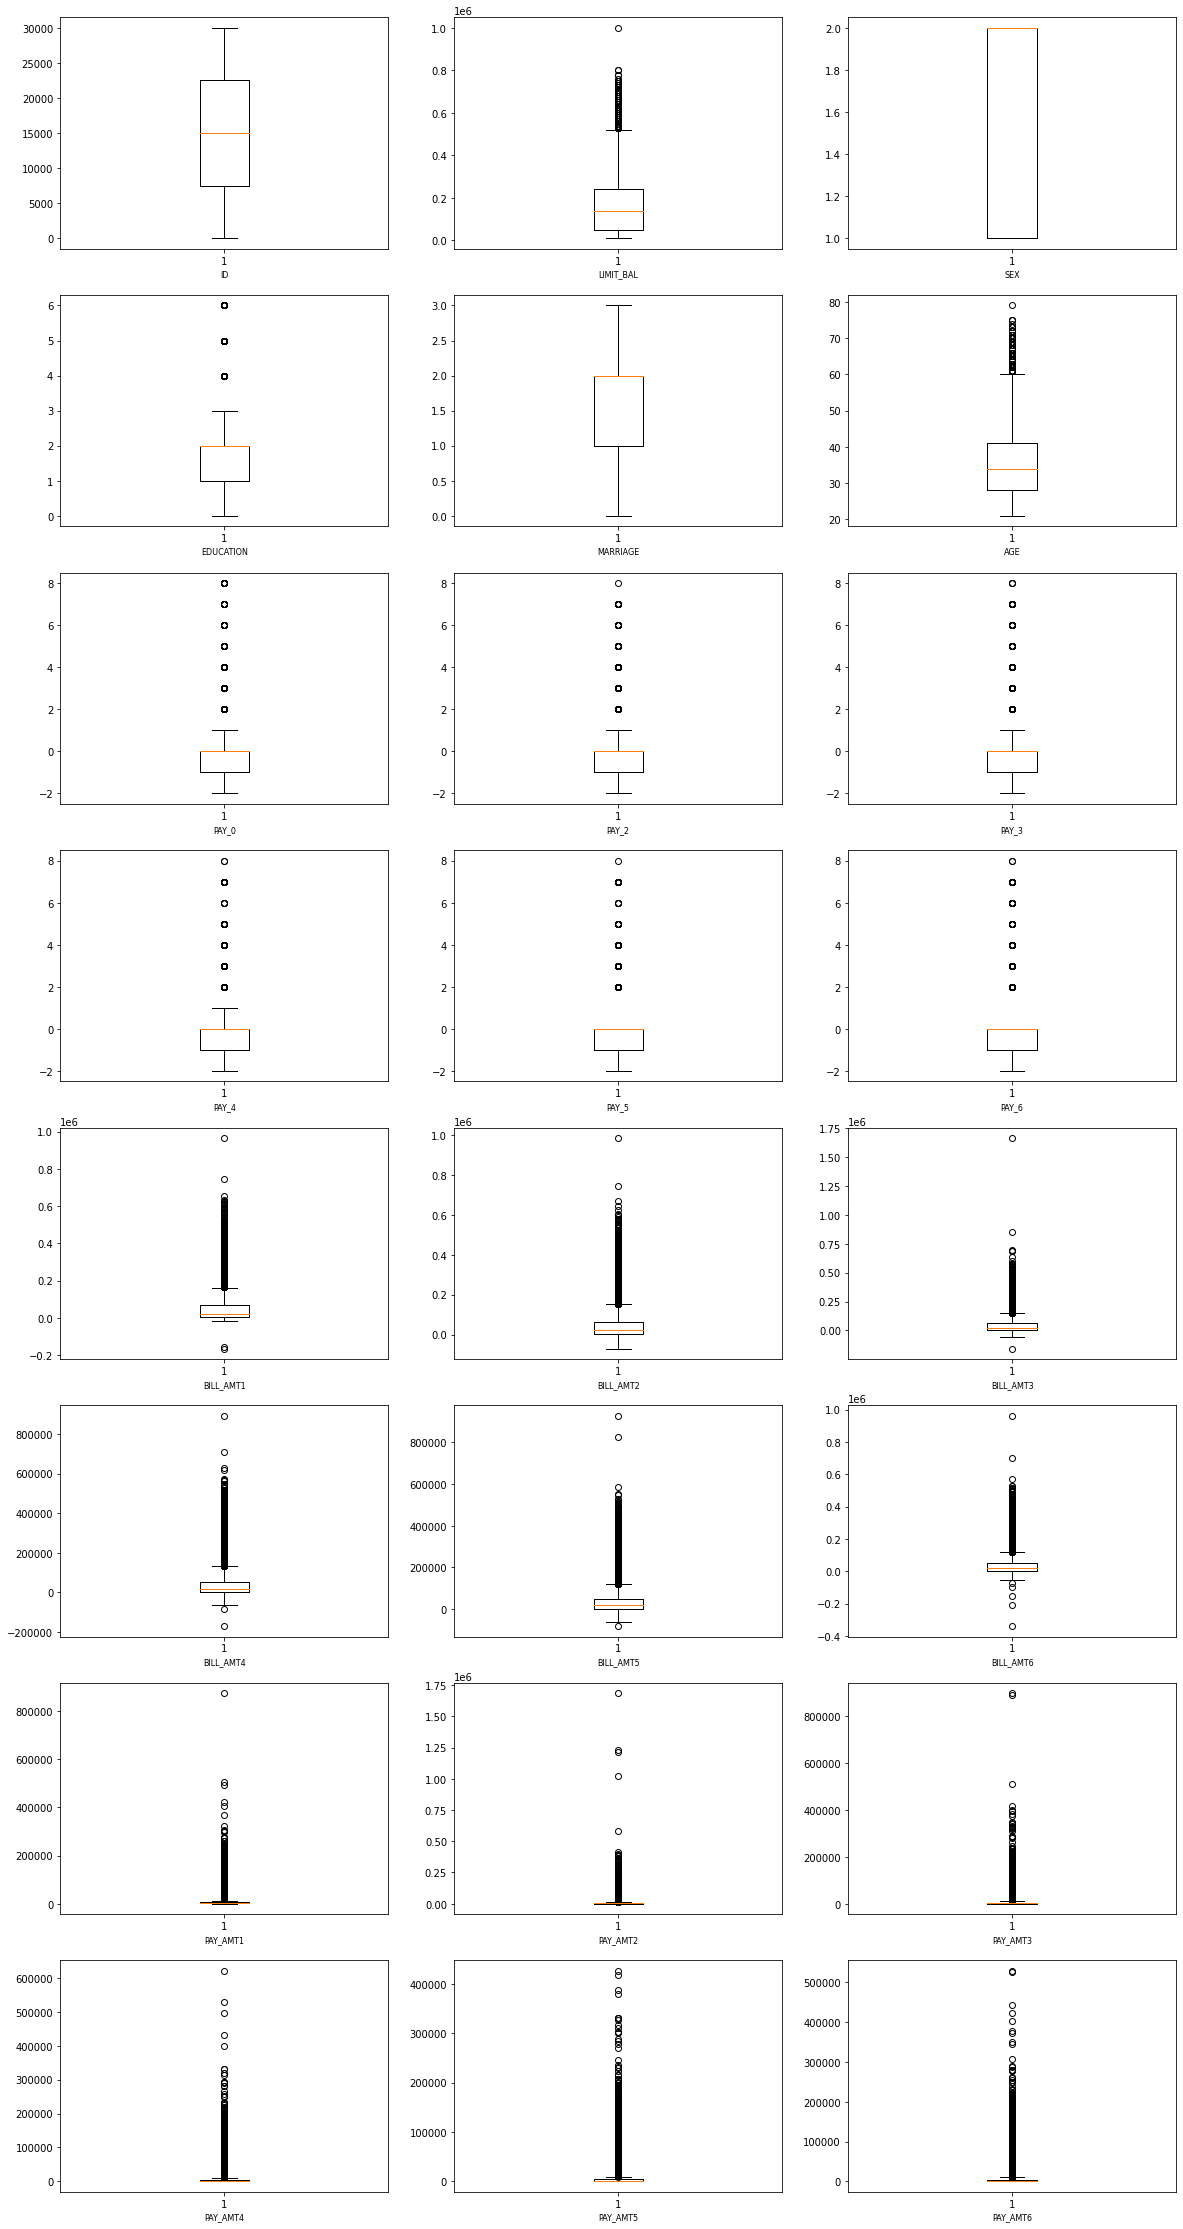

In [13]:
column = df.columns.tolist()[:24]  
fig = plt.figure(figsize=(20, 40)) 
for i in range(24):
    plt.subplot(8, 3, i + 1)   
    plt.boxplot(df[column[i]])
    plt.xlabel(column[i], fontsize=8)
plt.show()

In [14]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

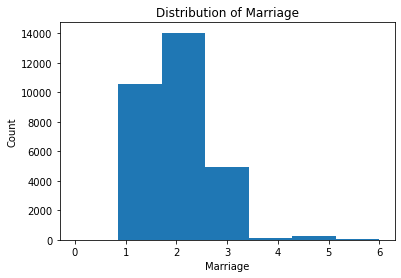

In [15]:
plt.hist(df.EDUCATION,7)
plt.title('Distribution of Marriage')
plt.xlabel('Marriage') 
plt.ylabel('Count') 
plt.show() 

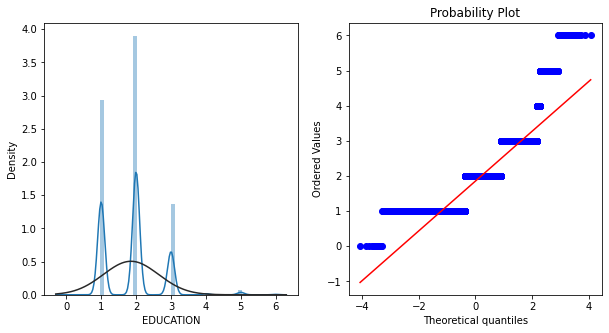

In [16]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(df['EDUCATION'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(df['EDUCATION'], plot=plt)

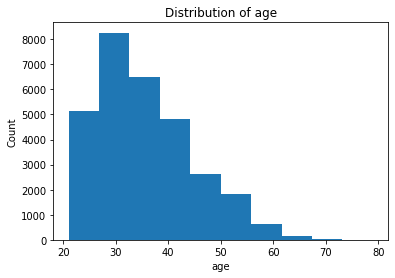

In [17]:
plt.hist(df.AGE,10)
plt.title('Distribution of age')
plt.xlabel('age') 
plt.ylabel('Count') 
plt.show() 

In [18]:
df['AGE']

0        24
1        26
2        34
3        37
4        57
         ..
29995    39
29996    43
29997    37
29998    41
29999    46
Name: AGE, Length: 30000, dtype: int64

### Data Preprocessing 

In [23]:
from sklearn.model_selection import train_test_split    # for spliting the datast into train and test
from sklearn.preprocessing import OneHotEncoder         # for categorical encoding
from sklearn.preprocessing import MinMaxScaler   

In [24]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [25]:
cat_col = df.columns.tolist()[2:5]
cat_col

['SEX', 'EDUCATION', 'MARRIAGE']

['AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

'default payment next month'

In [28]:
scaler = MinMaxScaler()
scaler.fit(df[num_col])
df[num_col] = scaler.transform(df[num_col])

In [29]:
df[num_col]

,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29996,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29997,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29998,0.344828,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [31]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(df[cat_col])          # fit the model on categorical column
encoded_cols = list(encoder.get_feature_names(cat_col))    # name of give columns
print(encoded_cols)
df[encoded_cols] = encoder.transform(df[cat_col]) 

['SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']


In [32]:
df[encoded_cols]

,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
X = df[num_col + encoded_cols]

In [60]:
X

,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,0.344828,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
y = df[target_col]
y


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [36]:
len(num_col)

19

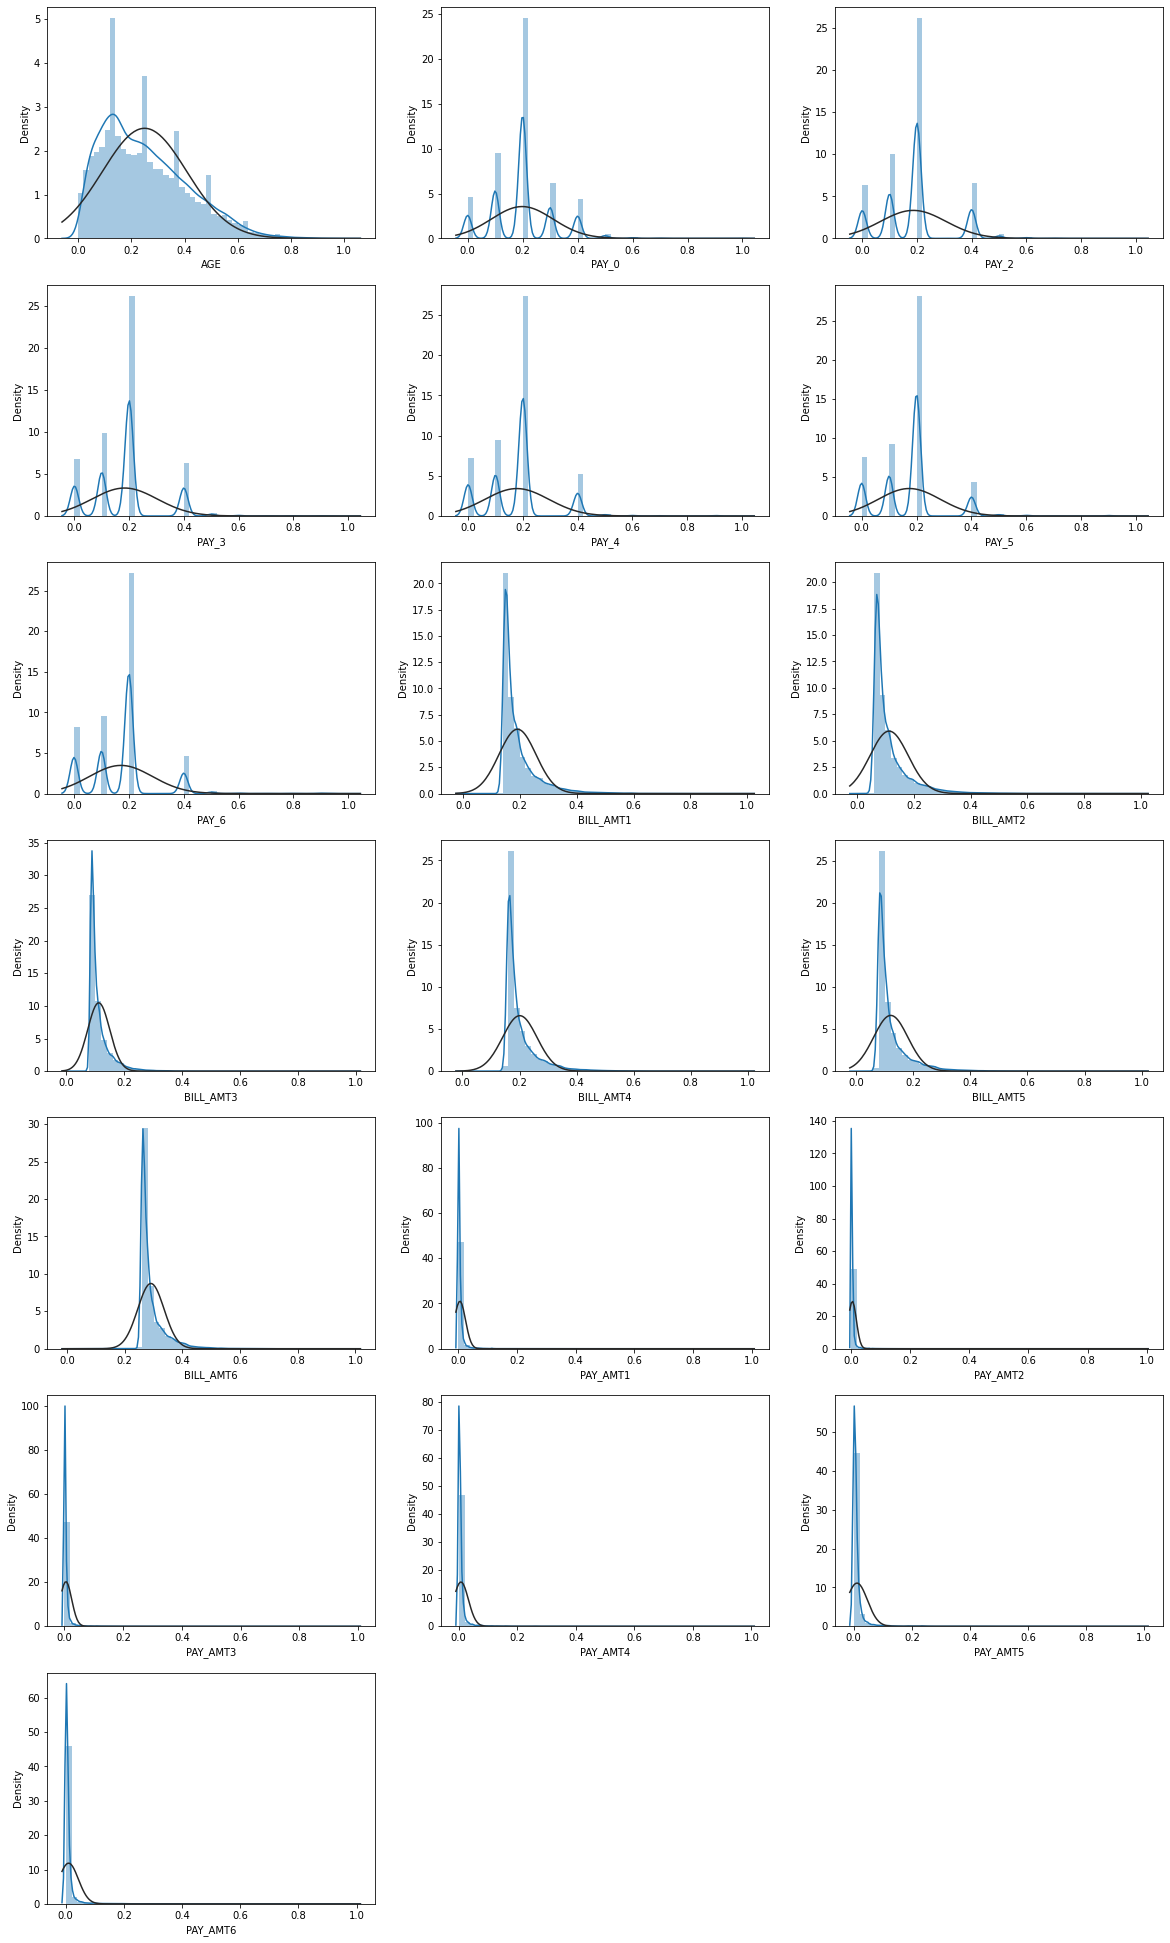

In [37]:
#column = df.columns.tolist()[1:24]  
fig = plt.figure(figsize=(20, 40)) 
for i in range(19):
    plt.subplot(8, 3, i + 1)   
    sns.distplot(df[num_col[i]],fit=stats.norm) 
plt.show()

In [38]:
df['default payment next month'].value_counts().tolist()

[23364, 6636]

## 没显示好, 要显示 0,1 xticks 或者default 
>先接着看下去

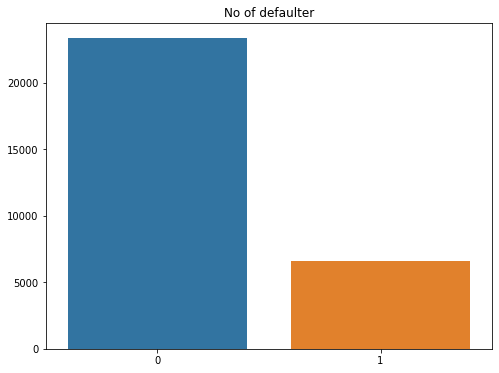

In [43]:
plt.figure(figsize = (8,6))
x = df['default payment next month'].value_counts().index
sns.barplot(x,df['default payment next month'].value_counts().tolist() )
# plt.xticks(x, )
plt.title('No of defaulter');
plt.show()

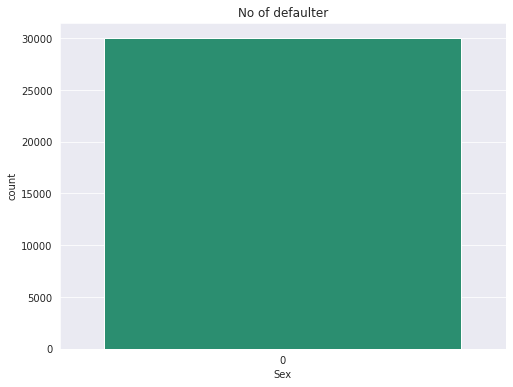

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (8,6))
sns.countplot(data = df['default payment next month'],  palette = 'Dark2')
plt.xlabel('Sex')
plt.title('No of defaulter');

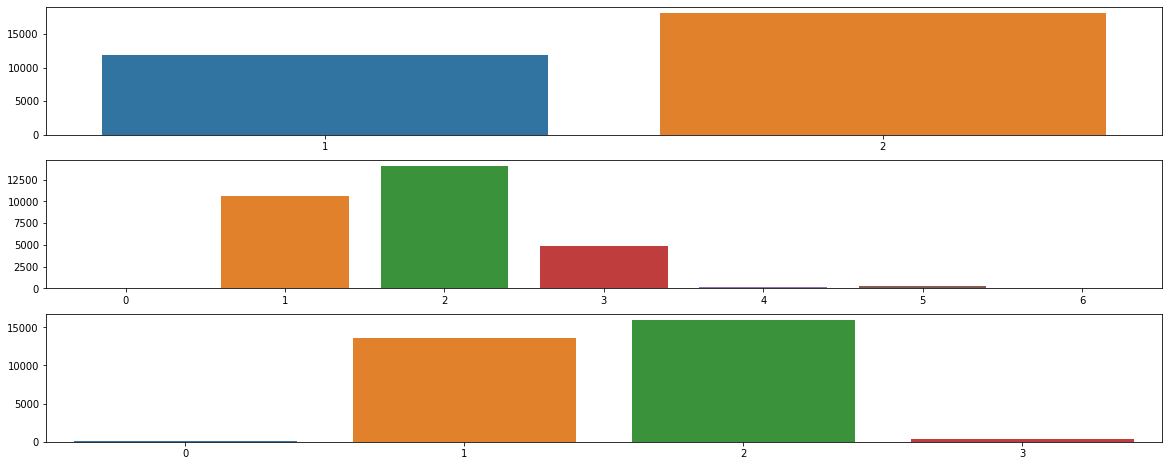

In [50]:
#column = df.columns.tolist()[1:24]  
fig = plt.figure(figsize=(20, 8)) 
for i in range(len(cat_col)):
    plt.subplot(3, 1, i + 1)   
    x = df[cat_col[i]].value_counts().index
    y = df[cat_col[i]].value_counts().tolist()
    sns.barplot(x,y)
plt.show()

 

#### heatmap 

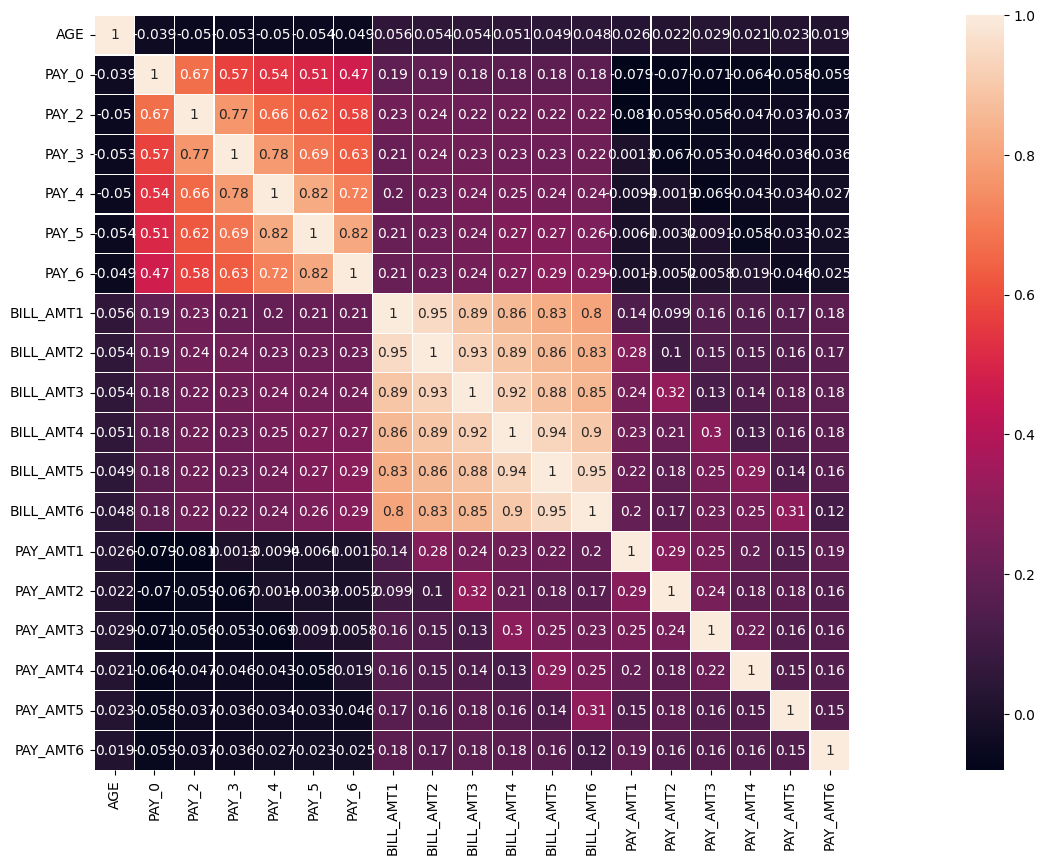

In [57]:
fig = plt.figure(figsize=(30, 10), dpi = 100) 
coor = df[num_col].corr()
sns.heatmap(coor,square= True, linewidths = 0.1, annot = True )
plt.show()

In [54]:
coor

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952,-0.018497,0.018497,0.005217,-0.025858,0.002569,0.017475,0.023286,0.027383,0.009027,0.003704,0.026687,-0.023794,-0.015255
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,-0.024755,0.024755,0.008270,0.258777,-0.147530,-0.139686,0.026413,0.000509,-0.006122,-0.011299,0.103701,-0.090998,-0.055806
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961,-1.000000,1.000000,-0.007738,-0.022750,0.025353,-0.007650,0.007189,0.011308,-0.007925,0.011895,0.030463,-0.031004,-0.001985
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006,-0.014232,0.014232,-0.050664,-0.797044,0.174176,0.642483,0.174292,0.386475,0.216522,0.047691,0.152703,-0.166892,0.050446
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339,0.031389,-0.031389,0.006724,0.142129,-0.051797,-0.110845,0.006117,-0.014294,-0.004876,-0.126254,-0.966643,0.915627,0.289442
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,0.090874,-0.090874,0.007904,-0.100423,-0.077626,0.231252,-0.011359,0.001206,0.037679,0.010731,0.449425,-0.466584,0.082771
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,0.057643,-0.057643,-0.009293,-0.142720,0.099177,0.058902,-0.027826,-0.009046,-0.005867,-0.005667,-0.016314,0.013173,0.017358
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,0.070771,-0.070771,-0.015635,-0.169215,0.122364,0.064590,-0.034226,-0.013767,-0.006203,-0.002481,-0.022525,0.020281,0.011657
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,0.066096,-0.066096,-0.013764,-0.160209,0.115644,0.062461,-0.032060,-0.016933,-0.007115,-0.001331,-0.030584,0.027195,0.016646
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,0.060173,-0.060173,-0.011763,-0.152402,0.110340,0.058382,-0.032509,-0.012813,-0.006745,-0.005438,-0.030

### Model building

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42 ) 

ValueError: ignored

### logtistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train,y_train)
y_pred1 = logistic.predict(X_val)
acc_1 = accuracy_score(y_val, y_pred1)
score1 = round(acc_1*100,4)
print('The accuracy score of logistic regression is {}%'.format(score1))

NameError: ignored

### k nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train,y_train)
y_pred2 = k_neighbors.predict(X_val)
acc_2 = accuracy_score(y_val, y_pred2)
score2 = round(acc_2*100,4)
print('The accuracy score of k nearest neighbors is {}%'.format(score2))

The accuracy score of k nearest neighbors is 79.5833%


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred3 = naive_bayes.predict(X_val)
acc_3 = accuracy_score(y_val, y_pred3)
score3 = round(acc_3*100,4)
print('The accuracy score Naive bayes is {}%'.format(score3))

The accuracy score Naive bayes is 28.5833%


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred4 = decision_tree.predict(X_val)
acc_4 = accuracy_score(y_val, y_pred4)
score4 = round(acc_4*100,4)
print('The accuracy score of Decision tree is {}%'.format(score4))

The accuracy score of Decision tree is 72.7292%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)

ye = random_forest.predict(X_train)
print(accuracy_score(y_train, ye))

y_pred5 = random_forest.predict(X_val)
acc_5 = accuracy_score(y_val, y_pred5)
score5 = round(acc_5*100, 4)
print('The accuracy score of random forest is {}%'.format(score5))

0.99609375
The accuracy score of random forest is 81.2917%


In [ ]:
importance_df = pd.DataFrame({'feature':X_train.columns,
                            'Importance': random_forest.feature_importances_}).sort_values('Importance', ascending = False)

importance_df.head(10)

,feature,Importance
1,PAY_0,0.101479
0,AGE,0.075162
7,BILL_AMT1,0.061790
8,BILL_AMT2,0.055102
9,BILL_AMT3,0.053310
13,PAY_AMT1,0.052896
10,BILL_AMT4,0.052479
12,BILL_AMT6,0.052384
11,BILL_AMT5,0.051420
14,PAY_AMT2,0.049751


Text(0.5, 1.0, 'Feature Importance')

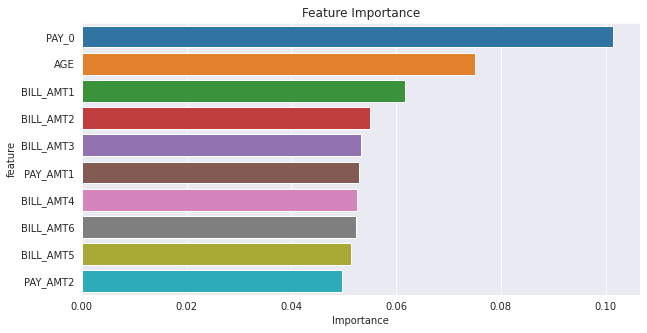

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(data = importance_df.head(10), x = 'Importance', y = 'feature');
plt.title('Feature Importance')